# Simple example notebook 
1. generate an instance of SK model
2. Load a sk-1rsb autoregressive architecture
3. Train its parameters on the Boltzmann distribution of the SK model

In [2]:
import networkx as nx
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import random
#torch.set_num_threads(1)

import python_lib.graph_gen as graph_gen
import python_lib.models as models
#from python_lib import solvers

from python_lib.nets import h2arnn
from python_lib import run_lib

In [3]:
%matplotlib inline

# Sherrington Kirkpatrick

In [4]:
coupl = "couplings_3D_EA"
pairs = "pairs"
coupl_val = np.array(np.genfromtxt(coupl, delimiter=','), dtype=np.float_)
pairs_val = np.array(np.genfromtxt(pairs, delimiter=' '), dtype=np.int_)

In [5]:
N = int(np.max(pairs_val) + 1)
N

125

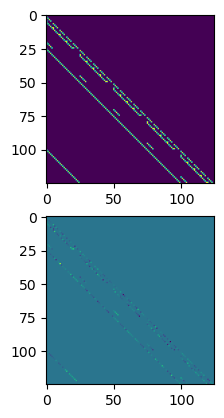

In [6]:
seed=0

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

fig, ax0 = plt.subplots(2,1)
J_interaction = torch.zeros(N,N)
J = torch.zeros(N,N)
inter_H = 0
H = inter_H * (torch.ones(N))

ii = 0
for (i,j) in pairs_val:
    #J_interaction[int(j)][int(i)] = 1
    if i > j:
        J_interaction[int(i)][int(j)] = 1
        J[int(i)][int(j)] = coupl_val[ii]
    else:
        J_interaction[int(j)][int(i)] = 1
        J[int(j)][int(i)] = coupl_val[ii]
    ii+=1
ax0[0].imshow(J_interaction)
ax0[1].imshow(J)

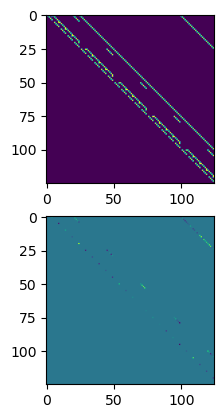

In [7]:
seed=0

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

fig, ax0 = plt.subplots(2,1)
J_interaction_inv = torch.zeros(N,N)
J_inv = torch.zeros(N,N)
inter_H = 0
H = inter_H * (torch.ones(N))

ii = 0
for (i,j) in pairs_val:
    #J_interaction[int(j)][int(i)] = 1
    if i < j:
        J_interaction_inv[int(i)][int(j)] = 1
        J[int(i)][int(j)] = coupl_val[ii]
    else:
        J_interaction_inv[int(j)][int(i)] = 1
        J_inv[int(j)][int(i)] = coupl_val[ii]
    ii+=1
ax0[0].imshow(J_interaction_inv)
ax0[1].imshow(J_inv)

In [8]:
n_i = 90
dep = J_interaction_inv[0:n_i,n_i+1:]
maks_0 = torch.argwhere(torch.sum(dep, dim=1)).squeeze(1)
maks_1 = torch.argwhere(torch.sum(dep, dim=0)).squeeze(1)
maks_0, maks_1

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
         77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]),
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]))

In [9]:
mask0 = []
mask1 = []
for n_i in range(N):
    dep = J_interaction_inv[0:n_i,n_i+1:]
    maks_0 = torch.argwhere(torch.sum(dep, dim=1))


0 125 0 0
1 124 1 6
2 123 2 10
3 122 3 14
4 121 4 17
5 120 5 20
6 119 6 22
7 118 7 24
8 117 8 26
9 116 9 28
10 115 10 30
11 114 11 32
12 113 12 34
13 112 13 36
14 111 14 38
15 110 15 40
16 109 16 41
17 108 17 42
18 107 18 43
19 106 19 44
20 105 20 45
21 104 21 46
22 103 22 47
23 102 23 48
24 101 24 49
25 100 25 50
26 99 26 50
27 98 27 50
28 97 28 50
29 96 29 50
30 95 30 50
31 94 31 50
32 93 32 50
33 92 33 50
34 91 34 50
35 90 35 50
36 89 36 50
37 88 37 50
38 87 38 50
39 86 39 50
40 85 40 50
41 84 41 50
42 83 42 50
43 82 43 50
44 81 44 50
45 80 45 50
46 79 46 50
47 78 47 50
48 77 48 50
49 76 49 50
50 75 50 50
51 74 50 50
52 73 50 50
53 72 50 50
54 71 50 50
55 70 50 50
56 69 50 50
57 68 50 50
58 67 50 50
59 66 50 50
60 65 50 50
61 64 50 50
62 63 50 50
63 62 50 50
64 61 50 50
65 60 50 50
66 59 50 50
67 58 50 50
68 57 50 50
69 56 50 50
70 55 50 50
71 54 50 50
72 53 50 50
73 52 50 50
74 51 50 50
75 50 50 50
76 49 50 49
77 48 50 48
78 47 50 47
79 46 50 46
80 45 50 45
81 44 50 44
82 43 50 43


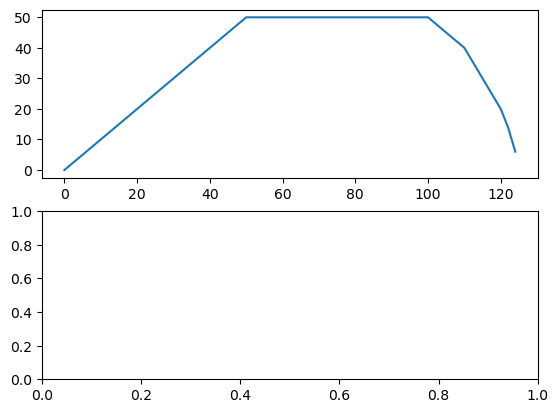

In [10]:
fig, ax0 = plt.subplots(2,1)

x = []
y = []
x1 = []
y1 = []
for i in range(N):
    dep = J_interaction[i:,0:i]
    #ax0[0].imshow(dep)
    x.append(i)
    x1.append(N-i)
    
    y.append(len(torch.argwhere(dep.sum(dim=0))))
    y1.append(len(torch.argwhere(dep.sum(dim=1))))
    print(i,x1[-1], y[-1], y1[-1])
ax0[0].plot(x,y)

# Exact solutions
enumerating all configurations.
Th. results

In [11]:
from python_lib.models import spins_model

device="cpu"
SK_model = spins_model.model(N, H, J, J_interaction, device=device)
SK_model_inv = spins_model.model(N, H, J_inv, J_interaction_inv, device=device)
beta_fin=4
beta_init = 0.1
step = 79
betas = np.linspace(beta_init, beta_fin, step)

stats_step=1

In [12]:
from python_lib.models import spins_model


SK_model_exact = spins_model.model(N, H, J, J_interaction, device=device)
f_exact = []
f_exact_infN = []
steps = 0
if N < 25:
    for beta_ in betas:
        if steps % stats_step == 0:
            f_exact.append(SK_model_exact.exact(beta_))
        steps += 1
else:
    print("sorry systems too bog for exact computation")


sorry systems too bog for exact computation


# Train net

In [13]:
lr = 0.001
max_step = 1000
batch_size = 2000
std_fe_limit=1e-4
batch_iter=20
stats_step=1

In [14]:
rho = h2arnn.SK_krsb
learn_first_layer = False
dict_nets = {"k": 1, "set_exact": False}
input_mask = torch.tril(torch.ones(N,N, device=device) - torch.eye(N, N, device=device), diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
net = h2arnn.h2arnn(
    SK_model, rho, input_mask, device=device, dict_nets=dict_nets, learn_first_l=learn_first_layer)

Total Trainable Params: 77750
Total Params: 77750


In [15]:
from python_lib.nets import h2arnn_gen
import importlib
importlib.reload(h2arnn_gen)

rho = h2arnn_gen.SK_krsb
learn_first_layer = False
dict_nets = {"k": 1, "set_exact": False}
net_sparse = h2arnn_gen.h2arnn(
    SK_model_inv, rho, J_interaction_inv, device=device, dict_nets=dict_nets, learn_first_l=learn_first_layer)

Total Trainable Params: 45820
Total Params: 45820


In [16]:
num_params = 0
num_params_sparse = 0
for n_i in range(net.N):
    n_temp = 0
    params = net.net[n_i].parameters()
    n_temp = sum(p.numel() for p in params if p.requires_grad)
    num_params += n_temp
    params_sparse = net_sparse.net[n_i].parameters()
    n_temp_sparse = sum(p.numel() for p in params_sparse if p.requires_grad)
    num_params_sparse += n_temp_sparse
    print(n_i, n_temp, n_temp_sparse)
    print(n_i, num_params, num_params_sparse)


0 1242 2
0 1242 2
1 1232 62
1 2474 64
2 1222 102
2 3696 166
3 1212 142
3 4908 308
4 1202 172
4 6110 480
5 1192 202
5 7302 682
6 1182 222
6 8484 904
7 1172 242
7 9656 1146
8 1162 262
8 10818 1408
9 1152 282
9 11970 1690
10 1142 302
10 13112 1992
11 1132 322
11 14244 2314
12 1122 342
12 15366 2656
13 1112 362
13 16478 3018
14 1102 382
14 17580 3400
15 1092 402
15 18672 3802
16 1082 412
16 19754 4214
17 1072 422
17 20826 4636
18 1062 432
18 21888 5068
19 1052 442
19 22940 5510
20 1042 452
20 23982 5962
21 1032 462
21 25014 6424
22 1022 472
22 26036 6896
23 1012 482
23 27048 7378
24 1002 492
24 28050 7870
25 992 502
25 29042 8372
26 982 502
26 30024 8874
27 972 502
27 30996 9376
28 962 502
28 31958 9878
29 952 502
29 32910 10380
30 942 502
30 33852 10882
31 932 502
31 34784 11384
32 922 502
32 35706 11886
33 912 502
33 36618 12388
34 902 502
34 37520 12890
35 892 502
35 38412 13392
36 882 502
36 39294 13894
37 872 502
37 40166 14396
38 862 502
38 41028 14898
39 852 502
39 41880 15400
40 84

In [33]:
from python_lib.nets import h2arnn_gen
import importlib
importlib.reload(h2arnn_gen)

rho = h2arnn_gen.SK_krsb
learn_first_layer = False
dict_nets = {"k": 1, "set_exact": False}
net_sparse = h2arnn_gen.h2arnn(
    SK_model_inv, rho, J_interaction_inv, device=device, dict_nets=dict_nets, learn_first_l=learn_first_layer)

Total Trainable Params: 44580
Total Params: 44580


In [34]:
stats_sparse = run_lib.train_net(net_sparse,
                    betas,
                    lr=lr,
                    max_step=max_step,
                    batch_size=batch_size,
                    std_fe_limit=std_fe_limit,
                    batch_iter=batch_iter,
                    stats_step=stats_step,
                    )

n_i:0 tensor([], dtype=torch.int64) tensor([], dtype=torch.int64) torch.Size([0, 125])


TypeError: only integer tensors of a single element can be converted to an index

In [11]:
stats = run_lib.train_net(net,
                    betas,
                    lr=lr,
                    max_step=max_step,
                    batch_size=batch_size,
                    std_fe_limit=std_fe_limit,
                    batch_iter=batch_iter,
                    stats_step=stats_step,
                    )

step: 932 0.30000 fe: -2.771 +- 0.00242 E: -0.885, S: 0.566, M: 0.0726 sample_t : 0.44 log_prob : 0.28 loss : 0.00031 optimizer : 0.27 stats : 0.0117523

In [ ]:
stats.to_csv("stats_3dEA.zip")

In [ ]:
torch.save(net, "net_3dEA.zip")